### Задача: ответить на 5 вопросов и построить 1 график по предоставленным данным.
 
#### Описание 	
Общая информация.

	Вы получили информацию о продажах одежды по месяцам (не все месяцы) за последний год в виде двух файлов.
    
	Задание01_Продажи_ToShare - история продаж.
    
	Задание01_Остатки_ToShare - количество остатков товара на складе, его цена продажи и себестоимость.
    
##### Необходимо ответить на вопросы.
    
-	1. Назовите общую сумму продаж в рублях за июль?
-	2. Какая общая сумма прибыли (продажи-себестоимость) в рублях в октябре?
-	3. Назовите артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе?
-	4. Какой остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе?
-	5. Определите, нормальное ли распределение ‘Продаж, шт’? Вычислите квадратное отклонение выборки, а также в каком диапазоне лежат 95% значений.
-	Постройте график распределения количества буквенных размеров ('M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS') в выборке


#### Какая информация доступна

###### Складские остатки на утро сегодняшнего дня - в файле "Задание_01_Остатки_ToShare", пояснения по столбцам
-	Артикул новый - код цветомодели (например, код красной футболки), у разных размеров одной цветомодели один код. Состоит из 16 символов (12 + 4 через пробел)
-	Размер - размер модели (или его отсутствие "no size", если вещь без размера)
-	Остаток на складе, шт.  - остатки товара на складе
-	Себестоимость, руб. - себестоимость одной единицы товара
-	Цена продажи, руб. - цена, за которую товар продавался в прошлом году
###### Статистика продаж на WB - файл "Задание01_Продажи_ToShare"
-	Артикул старый - код цветомоделей, но в старом формате. ВАЖНО, он отличается нового формата артикулов, а именно
-	Если он выглядит вот так (т.е. без знака "/"): "21022322U1535900", то тогда он является новым артикулом цветомодели
-	Если знак "/" на 13 позиции, например: "020245D5Z022/55D0", то тогда новый артикул цветомодели из него получается простым удалением символа "/", т.е. в нашем случае это будет ""020245D5Z02255D0""
-	А если знак "/" на 15 позиции, например: "02025727Y052D0/55", то тогда новый артикул цветомодели можно получить как "Левые 12 символов + правые два символа + два символа на позиция 13 и 14", т.е. в нашем случае это "02025727Y05255D0"
-	Есть несколько «ошибочных» позиций, у которых знак «/» на 17 позиции, в таком случае надо просто взять 16 левых символов
-	Размер — это размер одежды, в случае если размера нет ("no size"), то это кодируется "0" в данной выгрузке
-	Месяц - порядковый месяц, в котором были совершены продажи
-	Продажи, шт. - число проданных единиц за указанный месяц
-	ВАЖНО: не по всем артикулам есть информация по остаткам/цене продажи/себестоимости, по таким позициям считать, что 
	Их остаток равен 0
	Себестоимость равна 200 рублей / шт.
	Цена продажи составляет 1000 рублей / шт.

Работу можно выполнить любым удобным вам способом. От вас необходимо ответы на вопросы и график.
Ответы отправлять сообщением на мессенджер Telegram @beaty_city, в любое удобное время. Если возникнут вопросы, можно также задать их в мессенджере.
Работа примерно займет от 1 до 2 часов времени.
Срок выполнения задания максимум 4 дня.



In [1]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np

In [3]:
# загружаю файл с остатками
remains  = pd.read_excel('Задание01_Остатки_ToShare.xlsx')
remains.head(3)

,Артикул новый,Размер,"Остаток на складе, шт.","Себестоимость, руб.","Цена продажи, руб."
0,010112159012 0100 ...,M,118,1211,2846
1,010112159052 01P0 ...,L,247,465,1311
2,010112159052 01P0 ...,M,134,763,1564


In [4]:
remains.shape

(10328, 5)

In [5]:
# удаляю лишние пробелы
remains['Артикул новый'] = remains['Артикул новый'].str.strip()
remains['Размер'] = remains['Размер'].str.strip()

In [6]:
# загружаю файл с продажами
sales = pd.read_excel('Задание01_Продажи_ToShare.xlsx', sheet_name='Продажи')
sales.head(3)

,Артикул старый,Размер,Месяц,"Продажи, шт."
0,02025727Y052D0/55,XS,9,88
1,02025727Y052D0/55,S,6,128
2,020245D5Z022/55D0,M,7,83


In [7]:
sales.shape

(60074, 4)

In [8]:
# в файл с остатками добавляю колонку - "Артикул новый", заполняю путем преобразования колонки "Старый артикул"
sales['Артикул новый'] = 0
sales.loc[sales['Артикул старый'].str.len() == 16, 'Артикул новый'] = sales['Артикул старый'].apply(lambda x : x[:12]+ ' ' + x[12:])
sales.loc[sales['Артикул старый'].str.match('............/'), 'Артикул новый'] = sales['Артикул старый'].apply(lambda x : x[:12]+ ' ' + x[13:])
sales.loc[sales['Артикул старый'].str.match('............../'), 'Артикул новый'] = sales['Артикул старый'].apply(lambda x : x[:12]+ ' ' +x[-2:]+x[12:14])
sales.loc[sales['Артикул старый'].str.match('................/'), 'Артикул новый'] = sales['Артикул старый'].apply(lambda x : x[:12] + ' ' + x[12:16])

In [9]:
# проверяю незаполненные строки в новой колонке
len(sales.loc[sales['Артикул новый'] == 0, :])

0

In [10]:
# объединяю две таблицы по колонкам "Новый артикул" и "Размер"
data = sales.merge(remains, on=['Артикул новый', 'Размер'], how = 'left')

In [11]:
# есть ли пропуски
data.isnull().values.any()

True

In [12]:
# заполняю пропуски согласно условиям задания
data.loc[data['Остаток на складе, шт.'].isna(), 'Остаток на складе, шт.'] = 0
data.loc[data['Себестоимость, руб.'].isna(), 'Себестоимость, руб.'] = 200
data.loc[data['Цена продажи, руб.'].isna(), 'Цена продажи, руб.'] = 1000

In [13]:
data.isnull().values.any()

False

In [14]:
data.head(3)

,Артикул старый,Размер,Месяц,"Продажи, шт.",Артикул новый,"Остаток на складе, шт.","Себестоимость, руб.","Цена продажи, руб."
0,02025727Y052D0/55,XS,9,88,02025727Y052 55D0,945.0,564.0,1258.0
1,02025727Y052D0/55,S,6,128,02025727Y052 55D0,861.0,539.0,1471.0
2,020245D5Z022/55D0,M,7,83,020245D5Z022 55D0,1001.0,1057.0,2526.0


#### 1. Назовите общую сумму продаж в рублях за июль?

In [15]:
# добавляю колонки - "Сумма продаж по себестоимости" и "Сумма продажи(по отпускной цене)"
data['Сумма по себест'] = data['Себестоимость, руб.'] * data['Продажи, шт.']
data['Сумма продажи'] = data['Цена продажи, руб.'] * data['Продажи, шт.']
data.head(3)

,Артикул старый,Размер,Месяц,"Продажи, шт.",Артикул новый,"Остаток на складе, шт.","Себестоимость, руб.","Цена продажи, руб.",Сумма по себест,Сумма продажи
0,02025727Y052D0/55,XS,9,88,02025727Y052 55D0,945.0,564.0,1258.0,49632.0,110704.0
1,02025727Y052D0/55,S,6,128,02025727Y052 55D0,861.0,539.0,1471.0,68992.0,188288.0
2,020245D5Z022/55D0,M,7,83,020245D5Z022 55D0,1001.0,1057.0,2526.0,87731.0,209658.0


In [16]:
print('Общая сумма продаж в июле = ', data.loc[data['Месяц'] == 7, 'Сумма продажи'].sum())

Общая сумма продаж в июле =  1582298364.0


#### 2. Какая общая сумма прибыли (продажи-себестоимость) в рублях в октябре?

In [17]:
print('Общая сумма прибыли (продажи-себестоимость) в рублях в октябре = ', data.loc[data['Месяц'] == 10, 'Сумма продажи'].sum() - data.loc[data['Месяц'] == 10, 'Сумма по себест'].sum())

Общая сумма прибыли (продажи-себестоимость) в рублях в октябре =  960007250.0


Можно сделать сводную таблицу и вывести продажи, прибыль по всем месяцам

In [18]:
pivot_data = data.groupby(['Месяц'], as_index = False)[['Сумма по себест', 'Сумма продажи']].agg(sum)
pivot_data['Прибыль'] = pivot_data['Сумма продажи'] - pivot_data['Сумма по себест']
pivot_data.head()

,Месяц,Сумма по себест,Сумма продажи,Прибыль
0,6,623019810.0,1.580367e+09,957347025.0
1,7,624009955.0,1.582298e+09,958288409.0
2,8,626322260.0,1.588125e+09,961802767.0
3,9,623449833.0,1.581127e+09,957677270.0
4,10,625225028.0,1.585232e+09,960007250.0


#### 3. Назовите артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе?

In [19]:
pivot_data_2 = data.groupby(['Месяц', 'Артикул новый'], as_index = False)[['Сумма продажи']].agg(sum).sort_values(by=['Месяц', 'Сумма продажи'], ascending=False)
pivot_data_2.head()

,Месяц,Артикул новый,Сумма продажи
13572,12,42025327F563 7500,2032567.0
12475,12,02023714Z011 55D0,1987428.0
12767,12,020263213053 5100,1931997.0
12518,12,020241262242 75P0,1928118.0
12548,12,02024717Y042 51D0,1921141.0


In [20]:
print('Артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе - ', pivot_data_2.loc[pivot_data_2['Месяц'] == 8, 'Артикул новый'].values[4])

Артикул (новый), который в рейтинге продаж (в рублях) был на 5 месте в августе -  42025327F563 7500


#### 4. Какой остаток на складе ТОП-10 артикулов по продажам (в рублях) в августе?

In [21]:
# создаю список с Топ артикулами
top_10 = pivot_data_2.loc[pivot_data_2['Месяц'] == 8, 'Артикул новый'].values[: 10]
top_10

array(['32024712Y023 51D0', '02021714Z103 50D0', '02024717Y042 51D0',
       '420258223053 11S0', '42025327F563 7500', '22024721S032 50D0',
       '22023714Z113 55D0', '020263210013 6100', '02023714Z011 55D0',
       '020211202072 01P0'], dtype=object)

In [22]:
# остатки по Топ позициям
remains_top = remains[remains['Артикул новый'].isin(top_10)].copy(deep=True)

In [23]:
# добавляю необходимые колонки
remains_top['Сумма остатков по себест'] = remains_top['Остаток на складе, шт.'] * remains_top['Себестоимость, руб.']
remains_top['Сумма остатков по цене прод'] = remains_top['Остаток на складе, шт.'] * remains_top['Цена продажи, руб.']

In [24]:
print('Остаток по Топ 10 в шт = ', remains_top['Остаток на складе, шт.'].sum())
print('Остаток по Топ 10 в руб по себестоимости = ', remains_top['Сумма остатков по себест'].sum())
print('Остаток по Топ 10 в руб по цене продажи = ', remains_top['Сумма остатков по цене прод'].sum())

Остаток по Топ 10 в шт =  27455
Остаток по Топ 10 в руб по себестоимости =  30263974
Остаток по Топ 10 в руб по цене продажи =  76712716


#### 5. Определите, нормальное ли распределение ‘Продаж, шт’? Вычислите квадратное отклонение выборки, а также в каком диапазоне лежат 95% значений.

In [25]:
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


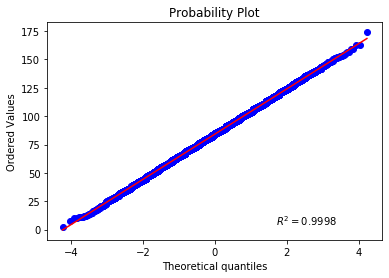

In [26]:
# для проверки нормальности прежде всего построю QQ-plot
stats.probplot(sales['Продажи, шт.'], dist="norm", plot=pylab, rvalue = True)  
plt.show()

Можно сделать предположение, что распределение нормальное

In [27]:
# Критерий Шапиро-Уилка 
stats.shapiro(sales['Продажи, шт.'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.999830424785614, 0.00018535286653786898)

В данном случае данный критерий не подходит

In [28]:
# Проведем тест Харки — Бера для определения номарльности распределения,
import statsmodels.api as sm
sm.stats.stattools.jarque_bera(sales['Продажи, шт.'])

(2.094201806743931,
 0.3509537244533841,
 -0.012351923974745873,
 3.0150455558974683)

p-value = 0.3509537244533841, значит распределение нормальное

In [29]:
print('Стандартное отклонение = ', sales['Продажи, шт.'].std())

Стандартное отклонение =  19.936632723810465


95% лежит в диапазоне

In [38]:
# нижняя граница
sales['Продажи, шт.'].mean() - 1.96 * sales['Продажи, шт.'].std()

45.023660526511094

In [39]:
# верхняя граница
sales['Продажи, шт.'].mean() + 1.96 * sales['Продажи, шт.'].std()

123.17526080384812

####  Постройте график распределения количества буквенных размеров ('M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS') в выборке

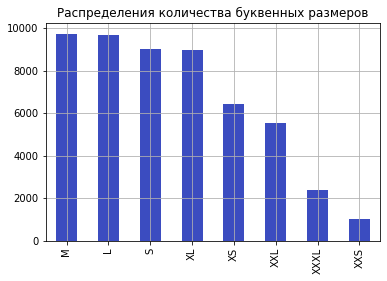

In [33]:
# только буквенные размеры
data[data['Размер'].isin(['M', 'L', 'S', 'XL', 'XS', 'XXL', 'XXXL', 'XXS'])]['Размер'].value_counts().plot(kind = 'bar', grid = True, colormap = 'coolwarm', title = 'Распределения количества буквенных размеров')

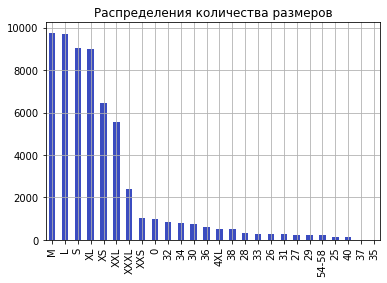

In [34]:
# все размеры
data['Размер'].value_counts().plot(kind = 'bar', grid = True, colormap = 'coolwarm', title = 'Распределения количества размеров')